<h1><center><b>Time-series of GhG emissions estimation for the learning of inverse modeling</b></center></h1> 

<h3><center>Carlos Gómez-Ortiz, Guillaume Monteil, Marko Scholze</center></h3>

<h3><center>Department of Physical Geography and Ecosystem Science, Lund University</center></h3>

<h4><center>E-mail: carlos.gomez@nateko.lu.se</center></h4>

### Abstract

<div style="text-align: justify"><p>Inverse modeling is a commonly used method to infer greenhouse gases (GhGs) sources and sinks based on their observed concentrations in the atmosphere. It is a Bayesian framework and requires a priori fluxes of all the evaluated sources and sinks, atmospheric observations, an atmospheric transport model that relates the observations to the a priori fluxes and the uncertainties of both fluxes and observations. Various techniques exist to solve the inversion.</p>

<p>Atmospheric inverse modeling is and will become even more important in the future quantification of GhGs to monitor the compliance of the Nationally Determined Contributions (NDCs) under the Paris Agreement. Therefore, the scientific and educational communities are becoming more interested in using atmospheric inversions and this has risen a necessity of creating tools that facilitate understanding as well as training in these techniques.</p>

<p>Quantifying anthropogenic GhG emissions, such as $CO_2$ from fossil fuel burning or CH4 from human activities, from atmospheric concentration observations is difficult since the carbon from all sources, both natural and anthropogenic, is mixed in the atmosphere, making it necessary to use other signals or tracers to separate anthropogenic emissions from natural sources. For fossil fuel $CO_2$ emissions radiocarbon ($^{14}CO_2$) is an excellent emission tracer because, due to its radioactive decay (~ 5000 years), it cannot be found in fossil fuels, which have been deposited millions of years ago as organic material. We have developed a Jupyter Notebook based on Python for the quantification of multi-tracer GhGs fossil fuel emissions and its isotopes. The notebook solves for the emissions by applying atmospheric inversions within a practical two-box model. The inverse modeling notebook is based on the analytical maximum a posteriori (MAP) solution of the Bayes’ theorem and allows to assess the error in the state vector and its uncertainty.</p>

<p>This basic but powerful notebook is meant to be an educational and training tool for university students and new researchers in the field as well as for researchers interested in the estimation of long-term (>centennial) time-series of GhG emissions since it is built as a modular algorithm to be easily modified, coupled or expanded to other approaches or models depending on the application. The notebook was initially developed for the inverse modeling of $CO_2$ and $^{14}CO_2$ simultaneously and it is being expanded for additional GHG such as $CH_4$ and $^{13}CH_4$.</p></div>

### Content

1. [Introduction](#Section_1)<br>
2. [Example of application](#Section_2)<br>
    2.1. [Importing packages](#Section_5.1)<br>
    2.2. [Importing and formating datasets](#Section_5.2)<br>
    2.3. [Setting errors](#Section_5.3)<br>
    2.4. [Inversion](#Section_5.4)<br>
    2.5. [Plotting the results](#Section_5.5)<br>
3. [References](#Section_6)<br>


### 1. Overview <a class="anchor" id="Section_1"></a>

<div style="text-align: justify">The terms data assimilation and inverse modeling are used with overlapping meanings in the literature. In general, both can be understood as improving the knowledge of the inputs of a model (inverse modeling) or its variables (data assimilation) given observations of its output. These variables are numerical quantities which are commonly called target variables. For the solution of the data assimilation problem, three independent pieces of information are necessary: the prior knowledge of the target variables, the knowledge of the observed quantities, and the relationship between target variables and observations represented by an observation operator (P. Rayner, 2020; P. J. Rayner, Michalak, & Chevallier, 2019). The knowledge on these pieces of information are commonly expressed as probability density functions (PDFs) following Bayes’ theorem:</div>

<h5><center>$p(x,y) \propto p(x|x^b)*p(y|y^o)*p(y|H(x))$ (1.1) <a class="anchor" id="Eq_1"></a></center></h5> 

<div style="text-align: justify"> where $x$  is the control vector containing the target variables, $y$ is the vector of observed variables and $H$ the observation operator mapping the target variables onto observables. The superscripts $b$ and $o$ correspond to background or prior information and observed, respectively. The PDF for the prior is represented by $p(x│x^b)$ and includes all the information we have about the quantity before a measurement is made. The PDF for the observation $p(y│y^o)$ represents our knowledge of the true value of the measured quantity given the measurement. Finally, The PDF for the observation operator $p(y│H(x))$ represents our state of knowledge of the true value of a modelled quantity that arises from a given state of the system (P. J. Rayner et al., 2019). It is important to select the adequate pieces of information to avoid infer major uncertainty or under/overestimation in the problem. For instance, all the variables in a model will not be target variables, just a set of them. Target variables are the set of quantities we wish to learn more about in the assimilation (P. J. Rayner et al., 2019).</div>

<div style="text-align: justify">The data assimilation approach commonly seeks to minimize numerically a cost function J(x) formulated in the Bayesian framework:</div>

<h5><center>$J(x)=(x-x^b)^TB^{-1}(x-x^b)+(y-Kx)^TR^{-1}(y-Kx)$ (1.2)</center></h5>

<div style="text-align: justify">where $B$ is the prior uncertainty covariance matrix and $R$ the observational uncertainty covariance matrix, controlling the weight of each observation and target variable in the optimization. The minimization of $J(x)$ looks for the value of $x$ for which the gradient ($\nabla_x J$) is equal to zero. The gradient of a complex function could be calculated either with the Jacobian or the Adjoint of the forward model, depending on the model, the size of the state vector and the size of the observation vector. The adjoint of a model is a separate code that facilitates the construction of its Jacobian, i.e. a matrix that stores the sensitivity of each observation to each control vector element (Bocquet et al., 2015; Scholze et al., 2017). In this case, due to the simplicity of the transport model, we will apply the analytical maximum <i>a posteriori</i> (MAP) solution of the cost function.</div>

<p>
<div style="text-align: justify">
To find the minimum of <a href="#Eq_2">Eq. 1.2</a>, we solve for $\nabla_xJ=0$:
</div>
</p>

<h5><center> 
$\nabla_xJ(x)=2B^{-1}(x-x^b)+2K^TR^{-1}(Kx-y)=0$ (4.5)
</center></h5>

<div style="text-align: justify">
The solution is straightforward and can be expressed in compact form as:
</div>

<h5><center> 
$\hat{x}=x^b+G(y-Kx^b)$ (4.6)
</center></h5>

<div style="text-align: justify">
with G given by:
</div>

<h5><center> 
$G=BK^T(KBK^T+R)^{-1}$ (4.7)
</center></h5>

### 2. Example of application <a class="anchor" id="Section_2"></a>

<h5>
<a class="navbar-brand" id="Figure_2">
    <center>
<img src="Picture1.png" width="500"/>
    </center>
</a>
    <center>
        Figure 1. 2-box model resolution and fluxes.
    </center>
</h5>

<p>
<div style="text-align: justify">
In this Jupyter Notebook, a complete inversion system was developed with most of the common functionalities included in state-of-the-art inversion systems with high level transport models, such as functions to handle control and observation vectors, prescribe target variables, calculate the cost function, among others. In this implementation a 2-box model is used as the atmospheric transport model, with each box representing one hemisphere as shown in <a href="#Figure_2">Fig. 2</a>, following the equations 1 and 2 in Basu et al. (2016):
</div>
</p>

<h5><center> 
$\frac{\text{d}}{\text{d}t}CO_2^{nat}=F_bio+F_oce$ (2.1) <a class="anchor" id="Eq_3"></a>
</center></h5>

<h5><center> 
$\frac{\text{d}}{\text{d}t}CO_2^{ff}=F_fos$ (2.2)
</center></h5>

<h5><center> 
$CO_2^{ff}(t=t_0)=0$ (2.3)
</center></h5>

<h5><center> 
$\frac{\text{d}}{\text{d}t}(C\Delta_atm)=\frac{N}{r_{std}}(F_nuc+F_cosmo)+\Delta_{fos}F_fos+Delta_atm(F_bio+F_oce)+F_biodis+F_ocedis$ (2.4)
</center></h5>

<p>
<div style="text-align: justify">
where $C$ is the atmospheric burden of $CO_2$, and ${\Delta}_{atm}$ is the isotope signature of $^{14}CO_2$ in the atmosphere. $F_{bio}$, $F_{oce}$ and $F_{fos}$, are net $CO_2$ surface fluxes to the atmosphere from the terrestrial biosphere, oceans, and fossil fuel burning, respectively. $\mathrm{\Delta}_{fos}$ is set to $-1000‰$ indicating the fossil fuel is $^{14}C$ free. $F_{nuc}$ and $F_{cosmo}$ are the $^{14}CO_2$ pure fluxes from the nuclear power and reprocessing plants and the cosmogenic production, respectively. $F_{biodis}$ and $F_{ocedis}$ are de biogenic and oceanic disequilibrium fluxes. Further information regarding the equations, notation and units can be found in section 2 of Basu et al. (2016). 
</div>
</p>

<p>
<div style="text-align: justify">
The preliminary results presented in this section where generated using the same data as in Basu et al. (2016), provided by Dr. Sourish Basu from the National Oceanic and Atmospheric Administration (NOAA). In this first results, two OSSEs where performed, (1) using the coupled $^{14}CO_2$-$CO_2$ 2-box model with <a href="#Eq_3">Eq. 2.1 to 2.4</a> and (2) using a $CO_2$ 2-box model with <a href="#Eq_3">Eq. 2.1 to 2.3</a>. A series of synthetic observations were generated from the true fluxes and a scaling factor of 0.1 for fossil fuel and biogenic fluxes, letting the other fluxes equal to the truth, to generate the prior fluxes. The uncertainties were assigned assuming the previous knowledge on the data, giving a big uncertainty to the disequilibrium fluxes (100% of the prior value) due to the difficulties in calculating this fluxes and smaller uncertainties to the fossil fuel, biogenic and oceanic fluxes (10% of the prior value).
</div>
</p>

#### 2.1. Importing packages <a class="anchor" id="Section_5.1"></a>

<div style="text-align: justify">
In the cell below you will import the packages necessary to run the rest of the cells.
</div>


In [354]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *
from matplotlib.dates import *
from matplotlib.cbook import *
from copy import *
from datetime import *
from calendar import *

from inverter import Inverter
from modelCO2 import modelCO2
from modelCO214C import modelCO214C

#### 2.2. Importing and formating datasets <a class="anchor" id="Section_5.2"></a>

<div style="text-align: justify">
In the cell below you will import and format the datasets corresponding to fluxes and observations into Python dictionaries as well as previsualize the datasets.
</div>

In [355]:
trueFluxes14C = load('trueFluxes14C.npy',allow_pickle='TRUE').item()
trueInit14C = load('trueInit14C.npy',allow_pickle='TRUE').item()
trueFluxesCO2 = load('trueFluxesCO2.npy',allow_pickle='TRUE').item()
trueInitCO2 = load('trueInitCO2.npy',allow_pickle='TRUE').item()
print(trueInitCO2)

{'co2nat': {'nh': 0.000330795, 'sh': 0.00033002}, 'co2ff': {'nh': 1e-15, 'sh': 1e-15}}


#### 2.3. Setting errors <a class="anchor" id="Section_5.3"></a>

<div style="text-align: justify">
When errors are not available, we can assume the error defining and scaling factor which will multiply the data. For example, if an scaling factor of $0.1$ is set, this means the error is the $10%$ of the original data. You can play around with this numbers and see how they affect the results.
</div>

In [356]:
fromTrue14C = {
    'co2': {
        'nh': {
            'ff': 0.1,
            'bio': 0.1,
            'oce': 1.
        },
        'sh': {
            'ff': 0.1,
            'bio': 0.1,
            'oce': 1.
        }
    },
    '14c': {
        'nh': {
            'biodis': 1.,
            'ocedis': 1.,
            'nuc': 1.,
            'cosm': 1.,
            'D_atm' : 1.
        },
        'sh': {
            'biodis': 1.,
            'ocedis': 1.,
            'nuc': 1.,
            'cosm': 1.,
            'D_atm' : 1.
        }
    }
}

errorFluxes14C = {
    'co2': {
        'nh': {
            'ff': 35.,
            'bio': 130,
            'oce': 1.e-6
        },
        'sh': {
            'ff': 122.,
            'bio': 350,
            'oce': 1.e-6
        }
    },
    '14c': {
        'nh': {
            'biodis': 100.,
            'ocedis': 100.,
            'nuc': 1.,
            'cosm': 1.,
            'D_atm' : 1.
        },
        'sh': {
            'biodis': 100.,
            'ocedis': 100.,
            'nuc': 1.,
            'cosm': 1.,
            'D_atm' : 1.
        }
    }
}

errorInit14C = {
    'co2nat': {
        'nh': 1.e-6,
        'sh': 1.e-6 
    },
    'co2ff': {
        'nh': 1.e-6,
        'sh': 1.e-6 
    },
    '14c': {
        'nh': 1.e-1,
        'sh': 1.e-1
    }
}

errorObs14C = {
    'co2nat': {
        'nh': {'value': 1.},
        'sh': {'value': 1.} 
    },
    'co2ff': {
        'nh': {'value': 1.},
        'sh': {'value': 1.} 
    },
    '14c': {
        'nh': {'value': 1.},
        'sh': {'value': 1.}
    }
}


In [357]:
fromTrueCO2 = {
    'co2': {
        'nh': {
            'ff': 0.1,
            'bio': 0.1,
            'oce': 1.
        },
        'sh': {
            'ff': 0.1,
            'bio': 0.1,
            'oce': 1.
        }
    }
}

errorFluxesCO2 = {
    'co2': {
        'nh': {
            'ff': 35.,
            'bio': 130.,
            'oce': 1.e-6
        },
        'sh': {
            'ff': 122.,
            'bio': 350.,
            'oce': 1.e-6
        }
    }
}

errorInitCO2 = {
    'co2nat': {
        'nh': 1.e-6,
        'sh': 1.e-6 
    },
    'co2ff': {
        'nh': 1.e-6,
        'sh': 1.e-6 
    }
}

errorObsCO2 = {
    'co2nat': {
        'nh': {'value': 1.},
        'sh': {'value': 1.} 
    },
    'co2ff': {
        'nh': {'value': 1.},
        'sh': {'value': 1.} 
    }
}

#### 2.4. Inversion <a class="anchor" id="Section_5.4"></a>

<div style="text-align: justify">
Finally, after importing and formatting the data and define the errors, we have the complete information to perform the inversions. The following cell uses the <code>inverter</code> package.
</div>

In [358]:
presFluxKey14C = {'co2': [],
               '14c': ['nuc', 'cosm', 'D_atm']}

c14C = Inverter(trueFluxes14C,
             trueInit14C,
             modelCO214C,
             presFluxKey14C,
             realObs = False,
             fromTrue = fromTrue14C,
             trueObs = None,
             realError = False,
             errorObs = errorObs14C,
             errorInit = errorInit14C,
             errorFluxes = errorFluxes14C)

priorFluxes14C, controlVector14C, trueVector14C = c14C.genPrior()
trueObs14C, obsVector14C = c14C.genObsVector()
prescribedFlux14C, prescribedConcVector14C = c14C.genPrescribed()
errorControlVector14C, errorObsVector14C = c14C.genErrorVector()

posteriorVector14C, posteriorFluxes14C, concPrior14C, concPosterior14C, B14C, R14C, H14C, G14C = c14C.inversion()

Cost function true: 0.8142979072732239 Cost function prior: 31.266767806828824 Cost function posterior: 0.6445117978815682


In [359]:
presFluxKeyCO2 = {'co2': ['oce']}

cCO2 = Inverter(trueFluxesCO2,
             trueInitCO2,
             modelCO2,
             presFluxKeyCO2,
             realObs = False,
             fromTrue = fromTrueCO2,
             trueObs = None,
             realError = False,
             errorObs = errorObsCO2,
             errorInit = errorInitCO2,
             errorFluxes = errorFluxesCO2)

priorFluxesCO2, controlVectorCO2, trueVectorCO2 = cCO2.genPrior()
trueObsCO2, obsVectorCO2 = cCO2.genObsVector()
prescribedFluxCO2, prescribedConcVectorCO2 = cCO2.genPrescribed()
errorControlVectorCO2, errorObsVectorCO2 = cCO2.genErrorVector()

posteriorVectorCO2, posteriorFluxesCO2, concPriorCO2, concPosteriorCO2, BCO2, RCO2, HCO2, GCO2 = cCO2.inversion()

Cost function true: 0.8086959125549784 Cost function prior: 17.154803763527795 Cost function posterior: 0.6443859404038105


#### 2.5. Plotting the results <a class="anchor" id="Section_5.5"></a>

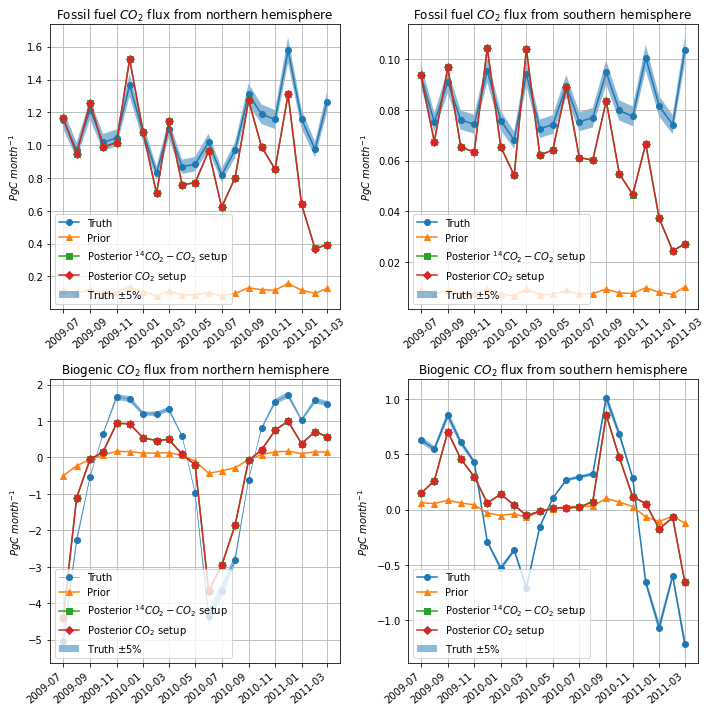

In [360]:
f, ax = subplots(2, 2, figsize=(10, 10))

f.autofmt_xdate()

[ax_ff_14c_nh, ax_ff_14c_sh], [ax_bio_14c_nh, ax_bio_14c_sh] = ax

ax_ff_14c_nh.plot(trueFluxes14C['time'], trueFluxes14C['co2']['nh']['ff']/1e13, marker='o')
ax_ff_14c_nh.plot(priorFluxes14C['time'], priorFluxes14C['co2']['nh']['ff']/1e13, marker='^')
ax_ff_14c_nh.plot(posteriorFluxes14C['time'], posteriorFluxes14C['co2']['nh']['ff']/1e13, marker='s')
ax_ff_14c_nh.plot(posteriorFluxesCO2['time'], posteriorFluxesCO2['co2']['nh']['ff']/1e13, marker='D')

ax_ff_14c_nh.fill_between(trueFluxes14C['time'], (trueFluxes14C['co2']['nh']['ff'].reshape(1,-1)[0]/1e13*.95), 
                      (trueFluxes14C['co2']['nh']['ff'].reshape(1,-1)[0]/1e13*1.05), alpha=.5)
ax_ff_14c_nh.set_ylabel('$PgC$ $month^{-1}$')
ax_ff_14c_nh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup', 'Truth $\pm 5$%'], loc='lower left')
ax_ff_14c_nh.set_title('Fossil fuel $CO_2$ flux from northern hemisphere')
ax_ff_14c_nh.grid()
ax_ff_14c_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_ff_14c_sh.plot(trueFluxes14C['time'], trueFluxes14C['co2']['sh']['ff']/1e13, marker='o')
ax_ff_14c_sh.plot(priorFluxes14C['time'], priorFluxes14C['co2']['sh']['ff']/1e13, marker='^')
ax_ff_14c_sh.plot(posteriorFluxes14C['time'], posteriorFluxes14C['co2']['sh']['ff']/1e13, marker='s')
ax_ff_14c_sh.plot(posteriorFluxesCO2['time'], posteriorFluxesCO2['co2']['sh']['ff']/1e13, marker='D')

ax_ff_14c_sh.fill_between(trueFluxes14C['time'], (trueFluxes14C['co2']['sh']['ff'].reshape(1,-1)[0]/1e13*.95), 
                      (trueFluxes14C['co2']['sh']['ff'].reshape(1,-1)[0]/1e13*1.05), alpha=.5)
ax_ff_14c_sh.set_ylabel('$PgC$ $month^{-1}$')
ax_ff_14c_sh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup', 'Truth $\pm 5$%'], loc='lower left')
ax_ff_14c_sh.set_title('Fossil fuel $CO_2$ flux from southern hemisphere')
ax_ff_14c_sh.grid()
ax_ff_14c_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)


ax_bio_14c_nh.plot(trueFluxes14C['time'], trueFluxes14C['co2']['nh']['bio']/1e13, marker='o', lw=0.5)
ax_bio_14c_nh.plot(priorFluxes14C['time'], priorFluxes14C['co2']['nh']['bio']/1e13, marker='^')
ax_bio_14c_nh.plot(posteriorFluxes14C['time'], posteriorFluxes14C['co2']['nh']['bio']/1e13, marker='s')
ax_bio_14c_nh.plot(posteriorFluxesCO2['time'], posteriorFluxesCO2['co2']['nh']['bio']/1e13, marker='D')

ax_bio_14c_nh.fill_between(trueFluxes14C['time'], (trueFluxes14C['co2']['nh']['bio'].reshape(1,-1)[0]/1e13*.95), 
                      (trueFluxes14C['co2']['nh']['bio'].reshape(1,-1)[0]/1e13*1.05), alpha=.5)
ax_bio_14c_nh.set_ylabel('$PgC$ $month^{-1}$')
ax_bio_14c_nh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup', 'Truth $\pm 5$%'], loc='lower left')
ax_bio_14c_nh.set_title('Biogenic $CO_2$ flux from northern hemisphere')
ax_bio_14c_nh.grid()
ax_bio_14c_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_bio_14c_sh.plot(trueFluxes14C['time'], trueFluxes14C['co2']['sh']['bio']/1e13, marker='o')
ax_bio_14c_sh.plot(priorFluxes14C['time'], priorFluxes14C['co2']['sh']['bio']/1e13, marker='^')
ax_bio_14c_sh.plot(posteriorFluxes14C['time'], posteriorFluxes14C['co2']['sh']['bio']/1e13, marker='s')
ax_bio_14c_sh.plot(posteriorFluxesCO2['time'], posteriorFluxesCO2['co2']['sh']['bio']/1e13, marker='D')

ax_bio_14c_sh.fill_between(trueFluxes14C['time'], (trueFluxes14C['co2']['sh']['bio'].reshape(1,-1)[0]/1e13*.95), 
                      (trueFluxes14C['co2']['sh']['bio'].reshape(1,-1)[0]/1e13*1.05), alpha=.5)
ax_bio_14c_sh.set_ylabel('$PgC$ $month^{-1}$')
ax_bio_14c_sh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup', 'Truth $\pm 5$%'], loc='lower left')
ax_bio_14c_sh.set_title('Biogenic $CO_2$ flux from southern hemisphere')
ax_bio_14c_sh.grid()
ax_bio_14c_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

f.tight_layout()
f.show()
f.savefig('Fluxes.png')

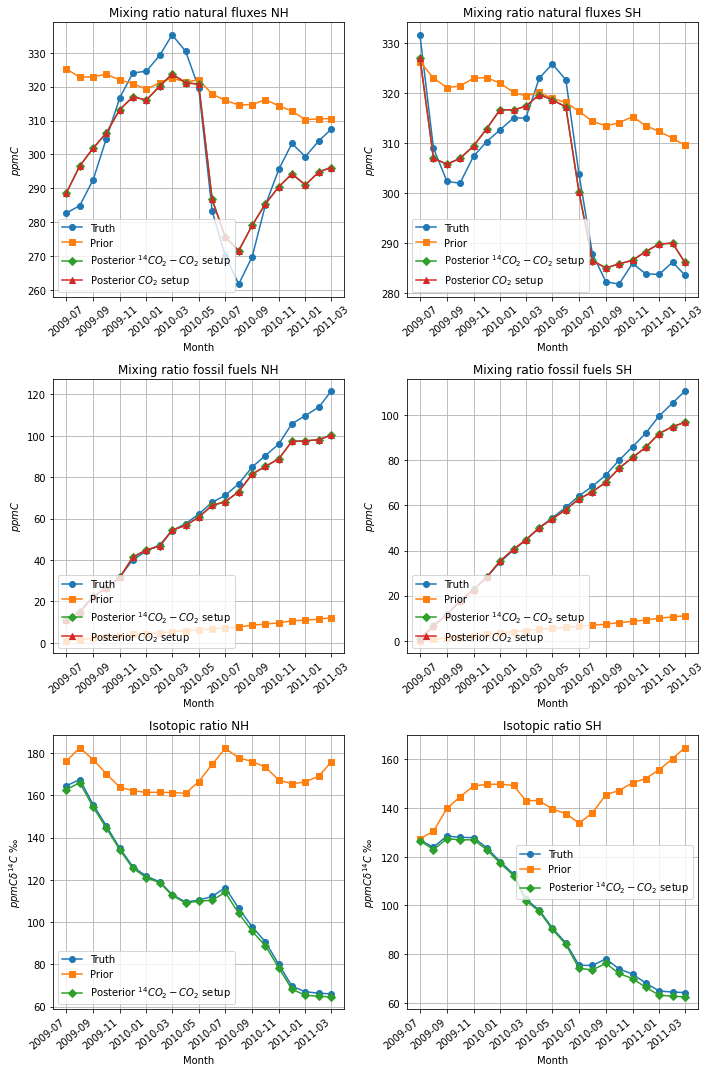

In [361]:
f, ax = subplots(3, 2, figsize=(10, 15))

f.autofmt_xdate()

[ax_nat_nh, ax_nat_sh], [ax_ff_nh, ax_ff_sh], [ax_14c_nh, ax_14c_sh] = ax

ax_nat_nh.plot(trueObs14C['co2nat']['nh']['time'], trueObs14C['co2nat']['nh']['value']*1e6, marker='o')

ax_nat_nh.plot(concPrior14C['co2nat']['nh']['time'], concPrior14C['co2nat']['nh']['value']*1e6, marker='s')

ax_nat_nh.plot(concPosterior14C['co2nat']['nh']['time'], concPosterior14C['co2nat']['nh']['value']*1e6, marker='D')
ax_nat_nh.plot(concPosteriorCO2['co2nat']['nh']['time'], concPosteriorCO2['co2nat']['nh']['value']*1e6, marker='^')

ax_nat_nh.set_ylabel('$ppm C$')
ax_nat_nh.set_xlabel('Month')
ax_nat_nh.set_title('Mixing ratio natural fluxes NH')
ax_nat_nh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup'], loc='lower left')
ax_nat_nh.grid()
ax_nat_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_nat_sh.plot(trueObs14C['co2nat']['sh']['time'], trueObs14C['co2nat']['sh']['value']*1e6, marker='o')

ax_nat_sh.plot(concPrior14C['co2nat']['sh']['time'], concPrior14C['co2nat']['sh']['value']*1e6, marker='s')

ax_nat_sh.plot(concPosterior14C['co2nat']['sh']['time'], concPosterior14C['co2nat']['sh']['value']*1e6, marker='D')
ax_nat_sh.plot(concPosteriorCO2['co2nat']['sh']['time'], concPosteriorCO2['co2nat']['sh']['value']*1e6, marker='^')


ax_nat_sh.set_ylabel('$ppm C$')
ax_nat_sh.set_xlabel('Month')
ax_nat_sh.set_title('Mixing ratio natural fluxes SH')
ax_nat_sh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup'], loc='lower left')
ax_nat_sh.grid()
ax_nat_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_ff_nh.plot(trueObs14C['co2ff']['nh']['time'], trueObs14C['co2ff']['nh']['value']*1e6, marker='o')

ax_ff_nh.plot(concPrior14C['co2ff']['nh']['time'], concPrior14C['co2ff']['nh']['value']*1e6, marker='s')

ax_ff_nh.plot(concPosterior14C['co2ff']['nh']['time'], concPosterior14C['co2ff']['nh']['value']*1e6, marker='D')
ax_ff_nh.plot(concPosteriorCO2['co2ff']['nh']['time'], concPosteriorCO2['co2ff']['nh']['value']*1e6, marker='^')

ax_ff_nh.set_ylabel('$ppm C$')
ax_ff_nh.set_xlabel('Month')
ax_ff_nh.set_title('Mixing ratio fossil fuels NH')
ax_ff_nh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup'], loc='lower left')
ax_ff_nh.grid()
ax_ff_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_ff_sh.plot(trueObs14C['co2ff']['sh']['time'], trueObs14C['co2ff']['sh']['value']*1e6, marker='o')

ax_ff_sh.plot(concPrior14C['co2ff']['sh']['time'], concPrior14C['co2ff']['sh']['value']*1e6, marker='s')

ax_ff_sh.plot(concPosterior14C['co2ff']['sh']['time'], concPosterior14C['co2ff']['sh']['value']*1e6, marker='D')
ax_ff_sh.plot(concPosteriorCO2['co2ff']['sh']['time'], concPosteriorCO2['co2ff']['sh']['value']*1e6, marker='^')

ax_ff_sh.set_ylabel('$ppm C$')
ax_ff_sh.set_xlabel('Month')
ax_ff_sh.set_title('Mixing ratio fossil fuels SH')
ax_ff_sh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup', 'Posterior $CO_2$ setup'], loc='lower left')
ax_ff_sh.grid()
ax_ff_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_14c_nh.plot(trueObs14C['14c']['nh']['time'], trueObs14C['14c']['nh']['value']*1e6, marker='o')
ax_14c_nh.plot(concPrior14C['14c']['nh']['time'], concPrior14C['14c']['nh']['value']*1e6, marker='s')
ax_14c_nh.plot(concPosterior14C['14c']['nh']['time'], concPosterior14C['14c']['nh']['value']*1e6, marker='D')
ax_14c_nh.set_ylabel('$ppm C\delta^{14}C$ ‰')
ax_14c_nh.set_xlabel('Month')
ax_14c_nh.set_title('Isotopic ratio NH')
ax_14c_nh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup'])
ax_14c_nh.grid()
ax_14c_nh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

ax_14c_sh.plot(trueObs14C['14c']['sh']['time'], trueObs14C['14c']['sh']['value']*1e6, marker='o')
ax_14c_sh.plot(concPrior14C['14c']['sh']['time'], concPrior14C['14c']['sh']['value']*1e6, marker='s')
ax_14c_sh.plot(concPosterior14C['14c']['sh']['time'], concPosterior14C['14c']['sh']['value']*1e6, marker='D')
ax_14c_sh.set_ylabel(u'$ppm C\delta^{14}C$ ‰')
ax_14c_sh.set_xlabel('Month')
ax_14c_sh.set_title('Isotopic ratio SH')
ax_14c_sh.legend(['Truth', 'Prior', 'Posterior $^{14}CO_2-CO_2$ setup'])
ax_14c_sh.grid()
ax_14c_sh.tick_params(axis='x', which='both', labelbottom=True, labelrotation=40)

f.tight_layout()
f.show()
f.savefig('Obs.png')

### 6. References<a class="anchor" id="Section_6"></a>

<div style="text-align: justify">
<ul>
    <li>Basu, S., Miller, J. B., & Lehman, S. (2016). Separation of biospheric and fossil fuel fluxes of CO2 by atmospheric inversion of CO2 and 14CO2 measurements: Observation System Simulations. Atmos. Chem. Phys., 16(9), 5665-5683. doi:10.5194/acp-16-5665-2016</li>
    <li>Rayner, P. J., Michalak, A. M., & Chevallier, F. (2019). Fundamentals of data assimilation applied to biogeochemistry. Atmos. Chem. Phys., 19(22), 13911-13932. doi:10.5194/acp-19-13911-2019</li>
</ul> 
</div>
